# K Means Color Quantization
یکی از کاربرد های الگوریتم **کی مینز**، مربوط به **تصاویر** است. کار اصلی که انجام می شود این است که عکس ها دریافت و سپس به جای چندین رنگ مجزا در هر پیکسل، تنها گروه مشخصی از رنگ ها یا کی به آن ها اختصاص پیدا می کند. به این صورت **حجم** تصاویر **کاهش** زیادی پیدا می کند. همچنین احتیاج به **پردازش کمتری** در رایانه پدید می آید

<br>

### :روند اصلی به شرح زیر است

br>
هر عکسی از **3 بعد** تشکیل شده است
<br>

**height, weight, RGB**
<br>
و مقدار هر خانه نیز عددی بین **0 و 255** می باشد
<br>

ما این سه بعد را در قالب **دو بعد** در می آوریم
<br>

به هر خانه یک گروه مشخصی را اختصاص می دهیم
<br>

در نهایت با تغییر شکل مجدد داده ها به **سه بعد**، آن ها به تصویر در می آوریم

## فراخوانی کتابخانه ها

In [2]:
import numpy as np
# mpimg: به منظور بردن تصویر به فضای برداری
# plt: به منظور تبدیل فضای برداری به تصویر
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### فراخوانی عکس

In [4]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

### تبدیل عکس به آرایه سه بعدی

In [6]:
image_as_array #

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

### مشاهده عکس اولیه


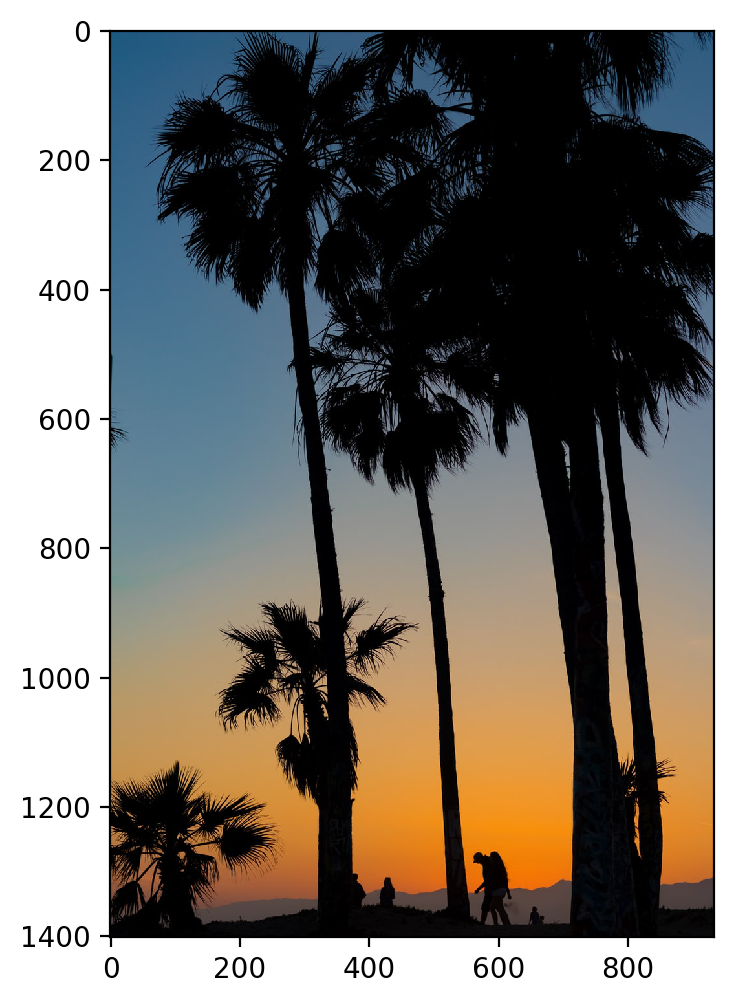

In [7]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors
## پیاده سازی مدل 


In [8]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### تغییر فضای بردار از سه بعد به دو بعد
این الگوریتم تنها متوجه فضای دو بعدی می شود یعنی تعدادی سطر و ستون بنابرین مجبوریم این کار را انجام بدهیم


In [9]:
(h,w,c) = image_as_array.shape

In [10]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [11]:
from sklearn.cluster import KMeans

In [12]:
model = KMeans(n_clusters=6)

In [13]:
model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
labels = model.fit_predict(image_as_array2d)

In [16]:
labels

array([3, 3, 3, ..., 0, 0, 0])

### مشاهده مرکز شش گروه احصا شده
و در ادامه حذف قسمت اعشاری آن ها. این ها شش رنگ اصلی ما خواهند بود

In [18]:

model.cluster_centers_

array([[  2.75599649,   2.57498121,   3.70000713],
       [137.23346556, 143.89663214, 143.8109635 ],
       [192.23523307, 154.50985948, 108.70411379],
       [ 71.13161346, 109.27474554, 137.68697555],
       [ 67.25056508,  61.52881886,  61.9868587 ],
       [219.17433607, 135.06087422,  46.29758209]])

In [19]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [21]:
rgb_codes

array([[  3,   3,   4],
       [137, 144, 144],
       [192, 155, 109],
       [ 71, 109, 138],
       [ 67,  62,  62],
       [219, 135,  46]])

In [22]:
labels

array([3, 3, 3, ..., 0, 0, 0])

In [23]:
rgb_codes[labels]

array([[ 71, 109, 138],
       [ 71, 109, 138],
       [ 71, 109, 138],
       ...,
       [  3,   3,   4],
       [  3,   3,   4],
       [  3,   3,   4]])

### تغییر فضای بردار از دو بعد به سه بعد
و در ادامه حذف قسمت اعشاری آن ها. این ها شش رنگ اصلی ما خواهند بود

In [24]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [26]:
quantized_image

array([[[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 67,  62,  62],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       [[ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138],
        ...,
        [ 71, 109, 138],
        [ 71, 109, 138],
        [ 71, 109, 138]],

       ...,

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]],

       [[  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4],
        ...,
        [  3,   3,   4],
        [  3,   3,   4],
        [  3,   3,   4]]

### مشاهده عکس نهایی


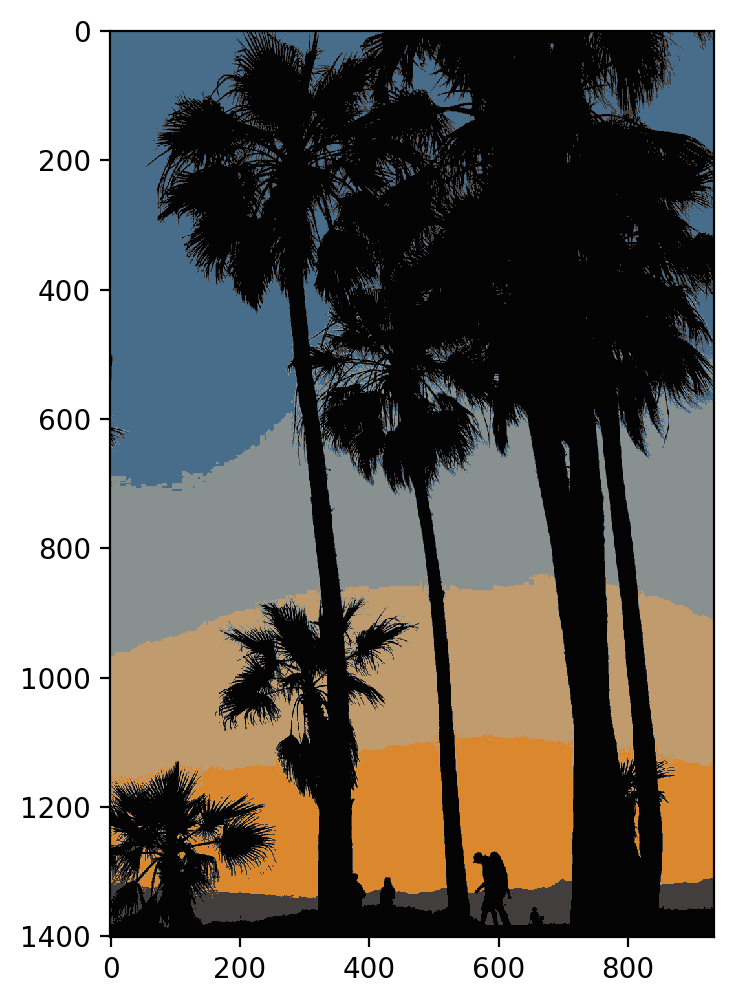

In [27]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)